## HealthPredict Pro : Dhara Khamar

### Problem Statement: 
- Diabetes is a chronic metabolic disorder characterized by elevated blood sugar levels, leading to various complications if not managed effectively. Early detection and timely intervention are crucial for mitigating the adverse effects of diabetes. However, diagnosing diabetes can be challenging, often relying on invasive tests and subjective clinical assessments. There is a need for a reliable, non-invasive, and efficient method for diabetes detection to enable early intervention and improve patient outcomes.

### Objective:
- The objective of the diabetes detection machine learning project is to develop a predictive model that accurately identifies individuals at risk of diabetes based on their clinical and demographic features. 
- The primary goals include:

  - Accuracy: Build a machine learning model with high accuracy in predicting diabetes status, minimizing false positives and false negatives.

  - Generalization: Ensure the model's ability to generalize well to unseen data by employing robust evaluation techniques such as cross-validation and independent testing.

  - Feature Importance: Identify the most significant clinical and demographic features contributing to diabetes prediction to gain insights into the underlying factors associated with the disease.

  - Interpretability: Strive for model interpretability to facilitate understanding by healthcare professionals and patients, enabling informed decision-making.

  - Scalability: Develop a scalable solution that can handle large volumes of data efficiently, allowing for potential deployment in various healthcare settings.

  - User-Friendly Interface: Design a user-friendly interface or application for healthcare practitioners to easily input patient data and obtain diabetes risk predictions, promoting practical clinical adoption.

### Dataset: 
- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code

- The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). 
- The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. 
- This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. 
- This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. 
- Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

### Step 1:   Import and Read Dataset  

In [1]:
# Importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets import and read the dataset
df= pd.read_csv("diabetes_prediction_dataset.csv")
df.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

### Step 2: Understading Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.shape

(100000, 9)

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [8]:
df.describe(include='object')

gender smoking_history
count   100000          100000
unique       3               6
top     Female         No Info
freq     58552           35816

### Insights: 
- The dataset contains 100,000 rows and 9 columns.
- Two columns, "gender" and "smoking history," are of object type, indicating categorical data.
- The remaining columns consist of numerical data, with most being of float or int type.
- "Hypertension," "heart diseases," and "diabetes" columns are binary, with values either 0 or 1, indicating the presence or absence of the respective condition.

### Step 3: Data Preprocessing

#### Missing values check

In [9]:
# Check for null values in each column
null_values_per_column = df.isnull().sum()
null_values_per_column

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Duplicate values check

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159         0  
3272           3.5                   80         0  
3418           6.5                  100         0  
3939           3.5                  130         0  
3960           6.0                  200         0  
...            ...                  ...       ...  
99980          6.1                  145         0  
99985          5.8                  145         0  
99989          5.0                  158         0  
99990          6.1                  100         0  
99995          6.2                   90         0  

[3854 rows x 9 columns]

In [11]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape

(96146, 9)

#### Cleaning dataset

In [12]:
df.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [13]:
# Removing rows where 'Gender' column is 'Other'
df = df[df['gender'] != 'Other']
df.shape

(96128, 9)

In [14]:
df.smoking_history.value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

### Step 4: Exploratory Data Analysis (EDA)

#### Categorical Varibles Analysis

In [15]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a subplot with one row and two columns for each categorical variable
for column in categorical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot pie chart
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0], colors=['skyblue', 'lightgreen'])
    axes[0].set_title(f'Pie Chart of {column}')
    axes[0].set_ylabel('')
    
    # Plot bar chart
    df[column].value_counts().plot(kind='bar', color='skyblue', ax=axes[1])
    axes[1].set_title(f'Bar Chart of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

#### insights:
- Male and female ratio in the dataset is approximately 42% male and 58% female, indicating a higher representation of females.
- Regarding smoking history, approximately 35% of individuals have never smoked, while 34% have not provided data about their smoking history.


#### Numerical Varibles Analysis

In [16]:
# Create a subplot with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot pie chart and count plot for 'hypertension' column
df['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0, 0], colors=['skyblue', 'lightgreen'])
axes[0, 0].set_title('Pie Chart of Hypertension')
axes[0, 0].legend(['No Hypertension', 'Hypertension'], loc='best')
axes[0, 0].set_ylabel('')

sns.countplot(data=df, x='hypertension', ax=axes[0, 1])
axes[0, 1].set_title('Count Plot of Hypertension')

# Plot pie chart and count plot for 'heart_disease' column
df['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1, 0], colors=['skyblue', 'lightgreen'])
axes[1, 0].set_title('Pie Chart of Heart Disease')
axes[1, 0].legend(['No Heart Disease', 'Heart Disease'], loc='best')
axes[1, 0].set_ylabel('')

sns.countplot(data=df, x='heart_disease', ax=axes[1, 1])
axes[1, 1].set_title('Count Plot of Heart Disease')

plt.tight_layout()
plt.show()

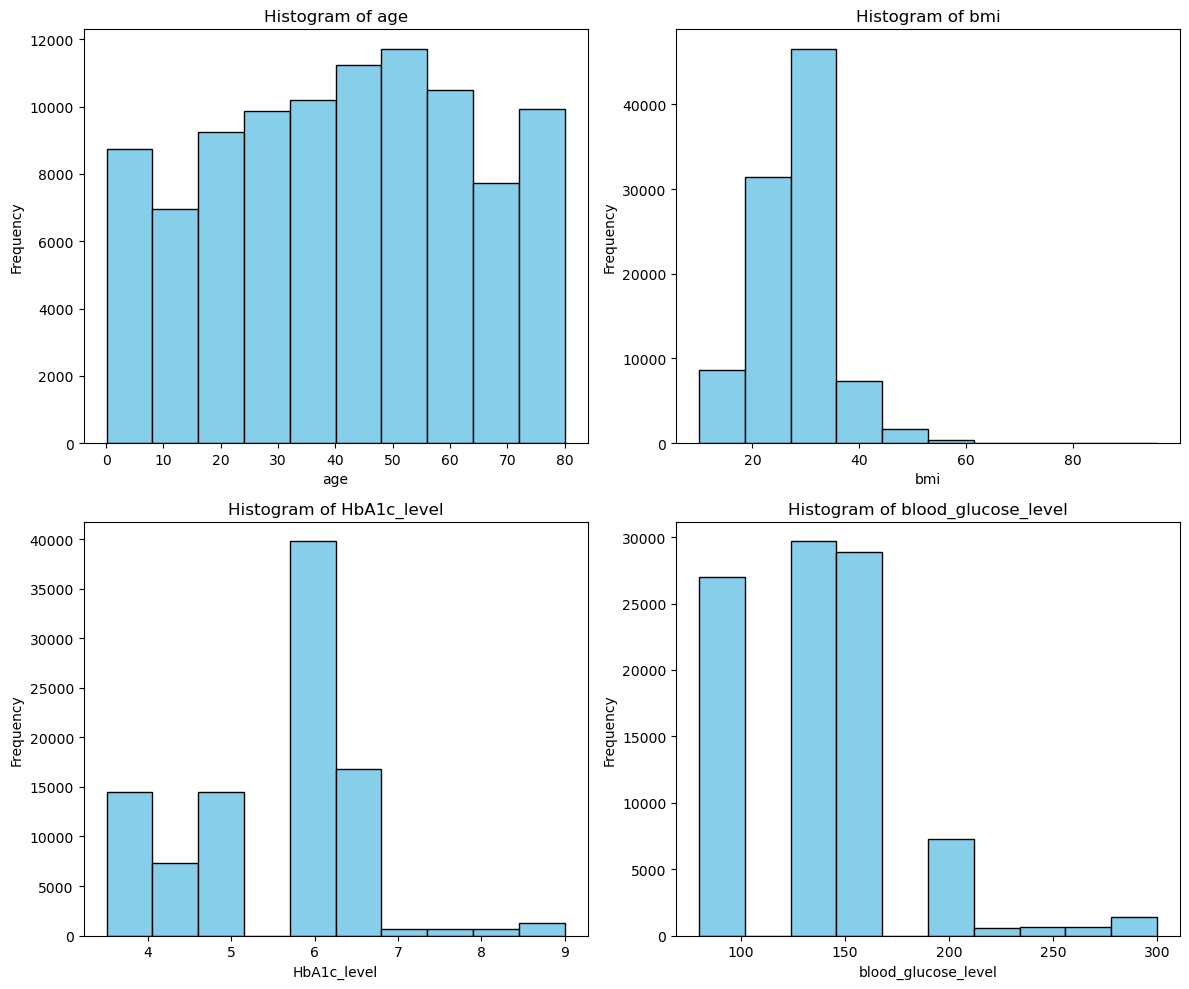

In [17]:
# Get numerical columns
numerical_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Create a subplot with 2 rows and 2 columns for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[column], bins=10, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Insighsts:
- Approximately 92% of people in the dataset do not have hypertension.
- About 96% of people in the dataset do not have heart disease, as inferred from the data.
- The dataset includes data from all age groups, with a concentration of data between the ages of 40 to 60 years.
- For BMI data, most individuals fall within the range of 20 to 40, with 30 being the most common BMI value.
- The majority of individuals have HbA1c_level values ranging from 5.7 to 6.8, although it also spans from 3.5 to 5 for some individuals.
- Common values for blood glucose level fall within the range of 80 to 160.

#### Data Imbalance Check

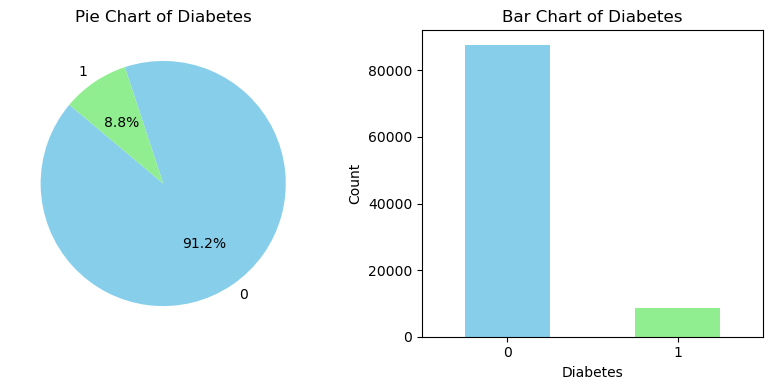

In [18]:
# Count the occurrences of each category in the 'diabetes' column
diabetes_count = df['diabetes'].value_counts()

# Create a subplot with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot pie chart for 'diabetes' column
axes[0].pie(diabetes_count, labels=diabetes_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
axes[0].set_title('Pie Chart of Diabetes')
axes[0].set_ylabel('')

# Plot bar chart for 'diabetes' column
diabetes_count.plot(kind='bar', color=['skyblue', 'lightgreen'], ax=axes[1])
axes[1].set_title('Bar Chart of Diabetes')
axes[1].set_xlabel('Diabetes')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Insights:
- There is a significant data imbalance in the dataset regarding diabetes status, 
with only 8.8% of people having diabetes and the remaining 92% not having diabetes.

#### Bivariate Analysis

In [19]:
# Define the age groups
age_groups = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [20]:
# Add the age groups as a new column
#df['age_group'] = age_groups

# Add the age groups as a new column
df['age_group'] = age_groups.astype(str)  # Convert labels to string
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes age_group  
0          6.6                  140         0     70-80  
1          6.6                   80         0     50-60  
2          5.7                  158         0     20-30  
3          5.0                  155         0     30-40  
4          4.8                  155         0     70-80

In [21]:
# Get numerical columns (excluding 'age')
cols = ['smoking_history', 'diabetes', 'hypertension', 'heart_disease']

In [22]:
# Create subplots for count plots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot count plots for each numerical variable against 'age_group' as hue
for i, column in enumerate(cols):
    sns.countplot(data=df, x=column, hue='age_group', ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} vs. Age Group')

plt.tight_layout()
plt.show()

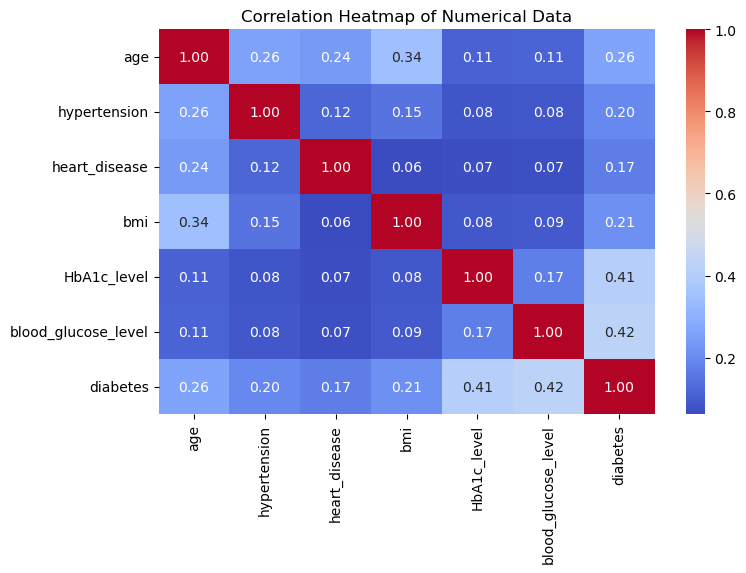

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

#### Insights: 
- Hypertension and heart disease are more commonly found in individuals aged 50 to 80 years.
- Diabetes prevalence appears to increase with age, becoming more common after the age of 40.
- Smoking history data is not available for children and teenagers, as indicated by the lack of information in these age groups.
- No strong correlations were observed between variables.

#### Relation with Target variable 

In [24]:
# Define the bmi groups
bmi_groups = pd.cut(df['bmi'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-100'])

In [25]:
# Add the age groups as a new column
df['bmi_group'] = bmi_groups.astype(str)  # Convert labels to string
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes age_group bmi_group  
0          6.6                  140         0     70-80     20-30  
1          6.6                   80         0     50-60     20-30  
2          5.7                  158         0     20-30     20-30  
3          5.0                  155         0     30-40     20-30  
4          4.8                  155         0     70-80     20-30

In [26]:
# Group by 'gender' and 'diabetes', and create a contingency table
gender_g = df.groupby(['gender', 'diabetes']).size().unstack()

# Group by 'hypertension' and 'diabetes', and create a contingency table
hyper_g = df.groupby(['hypertension', 'diabetes']).size().unstack()

# Group by 'heart_disease' and 'diabetes', and create a contingency table
heart_g = df.groupby(['heart_disease', 'diabetes']).size().unstack()

# Group by 'smoking_history' and 'diabetes', and create a contingency table
smoke_g = df.groupby(['smoking_history', 'diabetes']).size().unstack()

# Group by 'age_group' and 'diabetes', and create a contingency table
age_g = df.groupby(['age_group', 'diabetes']).size().unstack()

# Group by 'bmi_group' and 'diabetes', and create a contingency table
bmi_g = df.groupby(['bmi_group', 'diabetes']).size().unstack()

# Plot the contingency tables using bar plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

gender_g.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Gender vs. Diabetes')

hyper_g.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Hypertension vs. Diabetes')

heart_g.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease vs. Diabetes')

smoke_g.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Smoking History vs. Diabetes')

age_g.plot(kind='bar', stacked=True, ax=axes[2, 0])
axes[2, 0].set_title('Age Group vs. Diabetes')

bmi_g.plot(kind='bar', stacked=True, ax=axes[2, 1])
axes[2, 1].set_title('BMI Group vs. Diabetes')

plt.tight_layout()
plt.show()

#### Insights: 
- The ratio of diabetic to non-diabetic individuals appears to be roughly equal among both males and females. This observation holds true for hypertension and heart disease as well, indicating that these conditions are not gender-specific.
- Individuals who have never smoked can also have diabetes, as evidenced by the data. In fact, they may have a higher likelihood of having diabetes.
- The likelihood of developing diabetes increases after the age of 40, with a higher probability observed after the age of 60.

### Step 5: Data Preparation 

In [27]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes age_group bmi_group  
0          6.6                  140         0     70-80     20-30  
1          6.6                   80         0     50-60     20-30  
2          5.7                  158         0     20-30     20-30  
3          5.0                  155         0     30-40     20-30  
4          4.8                  155         0     70-80     20-30

#### One hot Encoding

In [28]:
# Apply one-hot encoding to categorical variables
cat_cols = ["gender", "smoking_history"]
one_hot_encoded_df  = pd.get_dummies(df[cat_cols], drop_first=True)
one_hot_encoded_df.head()

gender_Male  smoking_history_current  smoking_history_ever  \
0            0                        0                     0   
1            0                        0                     0   
2            1                        0                     0   
3            0                        1                     0   
4            1                        1                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      1                            0  
1                       0                      0                            0  
2                       0                      1                            0  
3                       0                      0                            0  
4                       0                      0                            0

#### Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
num_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [30]:
df.head()

gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.700709             0              1           never -0.314941   
1  Female  0.543261             0              0         No Info -0.000214   
2    Male -0.614187             0              0           never -0.000214   
3  Female -0.258049             0              0         current -0.572042   
4    Male  1.522640             1              1         current -1.061124   

   HbA1c_level  blood_glucose_level  diabetes age_group bmi_group  
0     0.994547             0.043558         0     70-80     20-30  
1     0.994547            -1.423041         0     50-60     20-30  
2     0.155949             0.483538         0     20-30     20-30  
3    -0.496294             0.410208         0     30-40     20-30  
4    -0.682649             0.410208         0     70-80     20-30

In [31]:
# Merge original DataFrame with one-hot encoded DataFrame
merged_df = pd.concat([df, one_hot_encoded_df], axis=1)
merged_df.head()

gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.700709             0              1           never -0.314941   
1  Female  0.543261             0              0         No Info -0.000214   
2    Male -0.614187             0              0           never -0.000214   
3  Female -0.258049             0              0         current -0.572042   
4    Male  1.522640             1              1         current -1.061124   

   HbA1c_level  blood_glucose_level  diabetes age_group bmi_group  \
0     0.994547             0.043558         0     70-80     20-30   
1     0.994547            -1.423041         0     50-60     20-30   
2     0.155949             0.483538         0     20-30     20-30   
3    -0.496294             0.410208         0     30-40     20-30   
4    -0.682649             0.410208         0     70-80     20-30   

   gender_Male  smoking_history_current  smoking_history_ever  \
0            0                        0                     0   
1            0                        0                     0   
2            1                        0                     0   
3            0                        1                     0   
4            1                        1                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      1                            0  
1                       0                      0                            0  
2                       0                      1                            0  
3                       0                      0                            0  
4                       0                      0                            0

In [32]:
# remove columns which are not required further 

# List of columns to remove
columns_to_remove = ['gender', 'smoking_history', 'age_group', 'bmi_group']

# Remove columns from DataFrame
df = merged_df.drop(columns=columns_to_remove)
df.head()

age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.700709             0              1 -0.314941     0.994547   
1  0.543261             0              0 -0.000214     0.994547   
2 -0.614187             0              0 -0.000214     0.155949   
3 -0.258049             0              0 -0.572042    -0.496294   
4  1.522640             1              1 -1.061124    -0.682649   

   blood_glucose_level  diabetes  gender_Male  smoking_history_current  \
0             0.043558         0            0                        0   
1            -1.423041         0            0                        0   
2             0.483538         0            1                        0   
3             0.410208         0            0                        1   
4             0.410208         0            1                        1   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                     0                       0                      1   
1                     0                       0                      0   
2                     0                       0                      1   
3                     0                       0                      0   
4                     0                       0                      0   

   smoking_history_not current  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

### Step 6: Train - Test Split on dataset

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target variable

# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

#### Handling Class Imbalance

In [34]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [35]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [36]:
#check churn and non churn customer ratio in dataset
y_train.value_counts()

0    65741
1    65741
Name: diabetes, dtype: int64

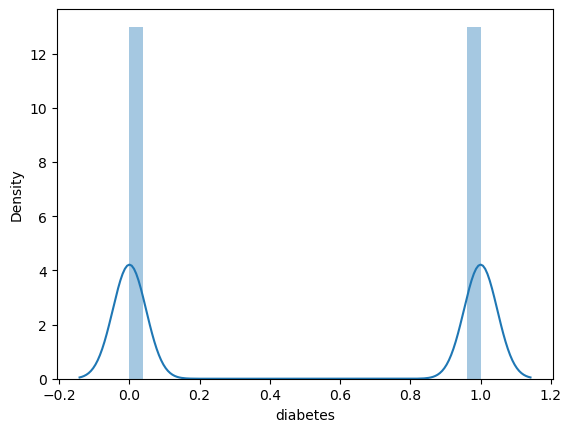

In [37]:
sns.distplot(y_train)
plt.show()

### Step 6: Model Building

#### Logistic Regression

In [38]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve


# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [39]:
# Logistic Regression
lr = LogisticRegression(random_state=100, class_weight='balanced')
lr.fit(X_train,y_train) 

LogisticRegression(class_weight='balanced', random_state=100)

In [40]:
# Function for  Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity  :', sensitivity)
    
    specificity = round(TN/float(TN + FP),3)
    print('Specificity :', specificity)
    

In [41]:
# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [42]:
train_matrix = confusion_matrix(y_train, y_train_pred)
test_matrix = confusion_matrix(y_test, y_test_pred)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.887
Sensitivity  : 0.887
Specificity : 0.886

Test Performance :

Accuracy : 0.883
Sensitivity  : 0.878
Specificity : 0.883


#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Decision tree model
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)

# Predictions on train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print('Train Performance :\n', classification_report(y_train, y_train_pred))

Train Performance :
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     65741
           1       0.82      0.94      0.88     65741

    accuracy                           0.87    131482
   macro avg       0.88      0.87      0.87    131482
weighted avg       0.88      0.87      0.87    131482



In [44]:
print('\nTest Performance :\n', classification_report(y_test, y_test_pred))


Test Performance :
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     21905
           1       0.30      0.92      0.45      2127

    accuracy                           0.80     24032
   macro avg       0.64      0.85      0.66     24032
weighted avg       0.93      0.80      0.84     24032



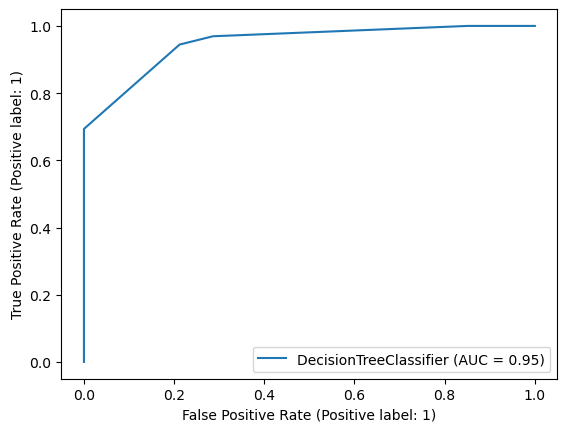

In [45]:
plot_roc_curve(dt, X_train, y_train)
plt.show()

#### Random forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [47]:
%%time
rf.fit(X_train, y_train)

Wall time: 650 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [48]:
rf.oob_score_

0.8818393392251411

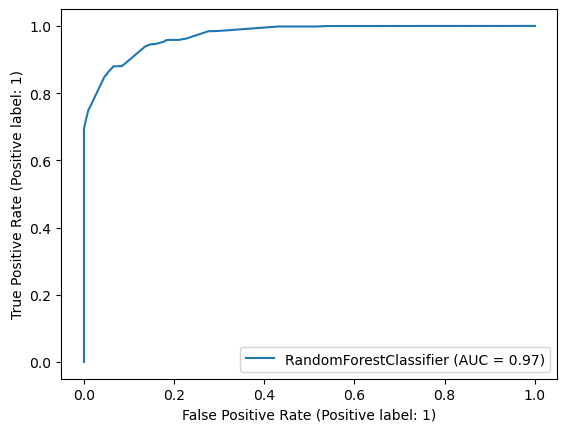

In [49]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [51]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [10,20,50,100],
    'n_estimators': [25, 40, 50]
}

In [52]:
rf_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [53]:
%%time
rf_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 2min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [25, 40, 50]},
             scoring='accuracy', verbose=1)

In [54]:
rf_grid_search.best_score_

0.9269634362375543

In [55]:
rf_best = rf_grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [56]:
# Modelling using the best RandomForest Estimator 
rf_best_fit = rf_best.fit(X_train, y_train)

# Prediction on Train set
y_train_pred_rf_best = rf_best_fit.predict(X_train)

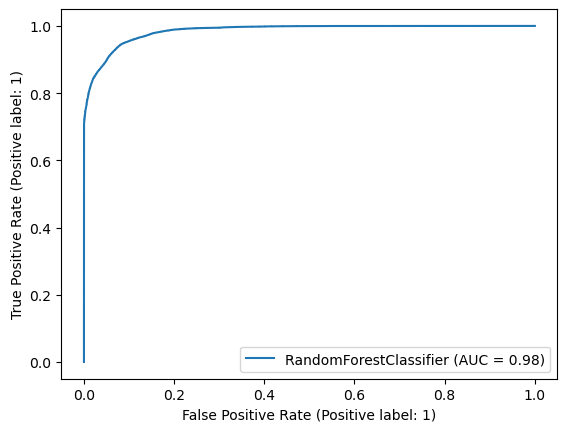

In [57]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [58]:
# Prediction on test set
y_test_pred_rf_best = rf_best_fit.predict(X_test)
y_test_pred_rf_best[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
##  RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.931
Sensitivity  : 0.942
Specificity : 0.92

Test Performance :

Accuracy : 0.911
Sensitivity  : 0.874
Specificity : 0.914


### Conclusion: 

Gender Distribution: The dataset skews towards females (58%) over males (42%).

Smoking History: Approximately 35% never smoked, with 34% missing data.

Health Conditions: Most lack hypertension (92%) or heart disease (96%).

Age Distribution: Concentrated between 40-60 years, with diabetes prevalence rising after 40 and notably increasing after 60.

BMI and Health Indicators: Most have BMI 20-40, HbA1c_level 5.7-6.8, and blood glucose 80-160.

Data Imbalance: Only 8.8% have diabetes, indicating imbalance.

Model Performance: Random Forest achieves the highest accuracy (91%), making it the preferred choice for diabetes prediction.

In summary, the dataset reveals gender disparities, health condition prevalence, age-related trends, and model performance, with Random Forest proving most effective for diabetes prediction. Further refinement may enhance practical healthcare applicability.